In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os

IMPORT DATA

In [66]:
print(os.getcwd())
os.chdir('c:\\Renzo\\U of T\\3rd Year\\Winter\\MIE363 Supply chain\\project-1-forecasting')

c:\Renzo\U of T\3rd Year\Winter\MIE363 Supply chain\project-1-forecasting


In [67]:
A = pd.read_excel('data\\A - AmbulanceCalls.xlsx', sheet_name='train')
B = pd.read_excel('data\\B - BreweryProduction.xlsx', sheet_name='training')
C = pd.read_excel('data\\C - ClimateData.xlsx', sheet_name='train')



In [68]:
A_test = pd.read_excel('data\\A - AmbulanceCalls.xlsx', sheet_name='test')
B_test = pd.read_excel('data\\B - BreweryProduction.xlsx', sheet_name='testing')
C_test = pd.read_excel('data\\C - ClimateData.xlsx', sheet_name='test')

In [69]:
A.head()

,date,calls
0,2020-01-06,263
1,2020-01-13,294
2,2020-01-20,332
3,2020-01-27,266
4,2020-02-03,283


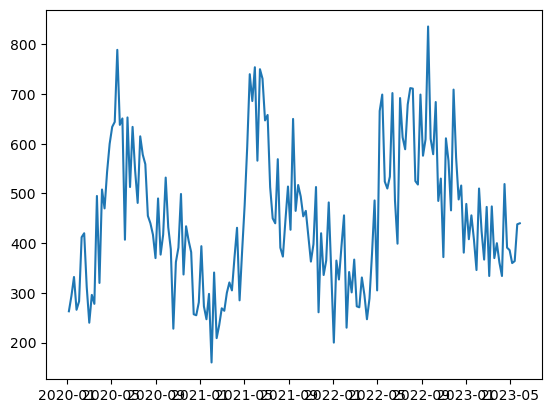

In [70]:
plt.plot(A['date'], A['calls'])
plt.show()

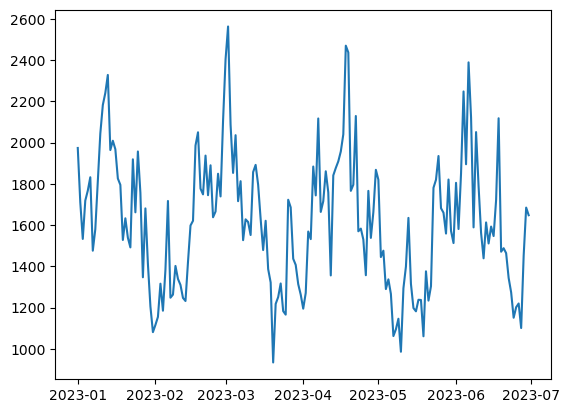

In [71]:
plt.plot(B['date'], B['kilolitres'])

In [72]:
C.head()

,Date,ppm
0,2023-06-05,319
1,2023-06-06,311
2,2023-06-07,305
3,2023-06-08,297
4,2023-06-09,290


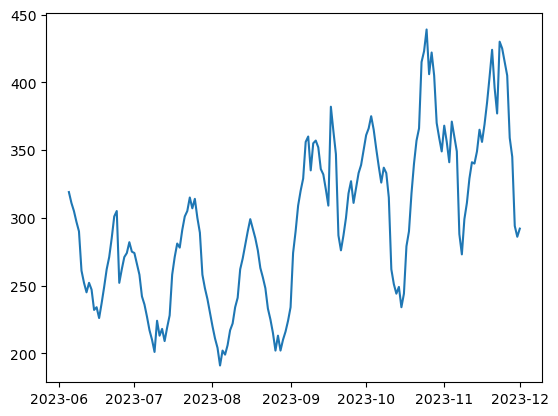

In [73]:
plt.plot(C['Date'], C['ppm'])

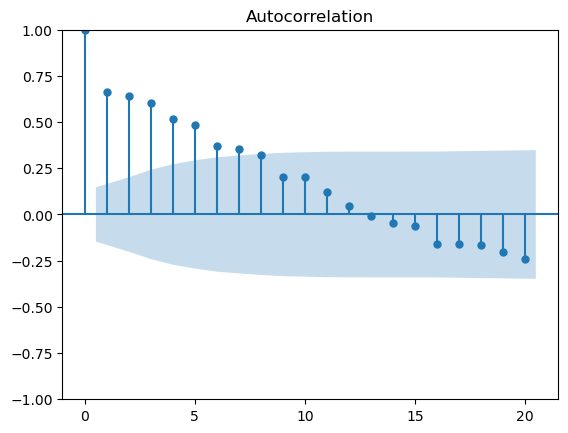

In [74]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(A['calls'], lags=20, alpha=0.05)
plt.show()

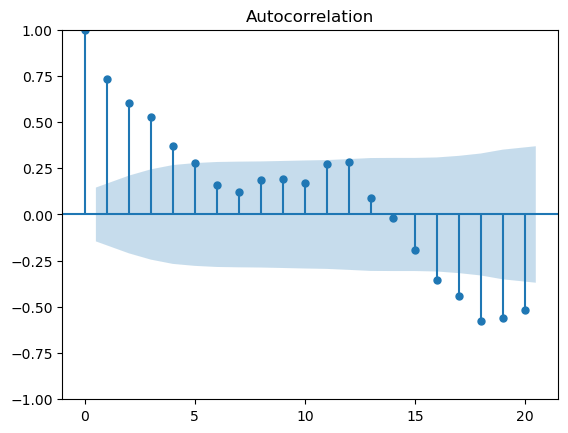

In [75]:
plot_acf(B['kilolitres'], lags=20, alpha=0.05)
plt.show()

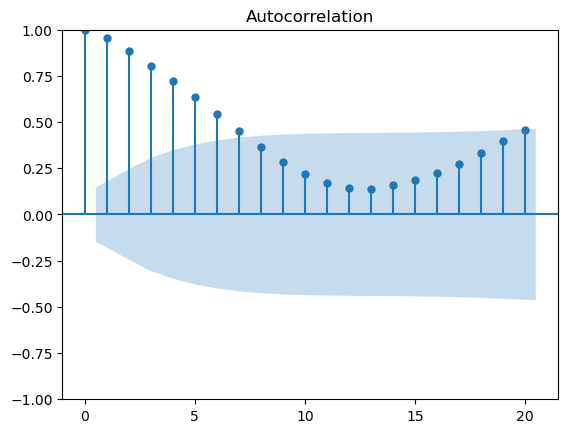

In [76]:
plot_acf(C['ppm'], lags=20, alpha=0.05)
plt.show()

TRAINING

In [223]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

A_winter = ExponentialSmoothing(A['calls'], trend='add', seasonal='add', seasonal_periods=52).fit()

B_winter = ExponentialSmoothing(B['kilolitres'], trend='add', seasonal='add', seasonal_periods=33).fit()

C_winter = ExponentialSmoothing(C['ppm'], trend='add', seasonal='add', seasonal_periods=24).fit()

In [224]:
pred_A = A_winter.forecast(steps=len(A_test))

pred_B = B_winter.forecast(steps=len(B_test))

pred_C = C_winter.forecast(steps=len(C_test))

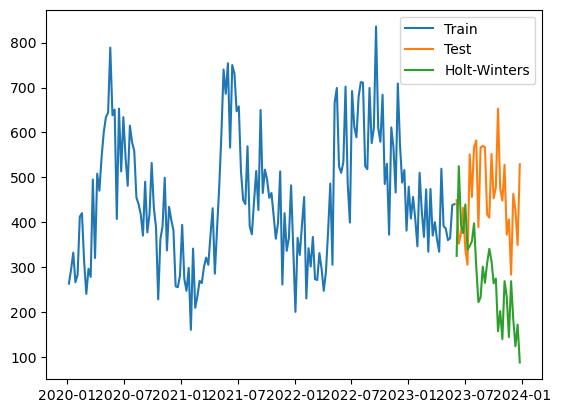

In [225]:
plt.plot(A['date'], A['calls'], label='Train')
plt.plot(A_test['date'], A_test['calls'], label='Test')
plt.plot(A_test['date'], pred_A, label='Holt-Winters')
plt.legend(loc='best')

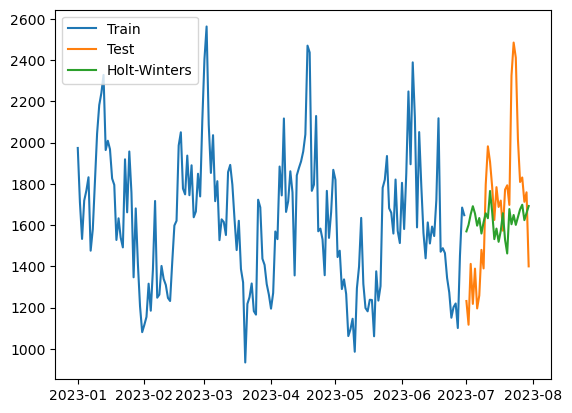

In [226]:
plt.plot(B['date'], B['kilolitres'], label='Train')
plt.plot(B_test['Date'], B_test['kilolitres'], label='Test')
plt.plot(B_test['Date'], pred_B, label='Holt-Winters')
plt.legend(loc='best')

In [227]:
C_test.head()

,Date,ppm
0,2023-12-02,332
1,2023-12-03,352
2,2023-12-04,399
3,2023-12-05,419
4,2023-12-06,410


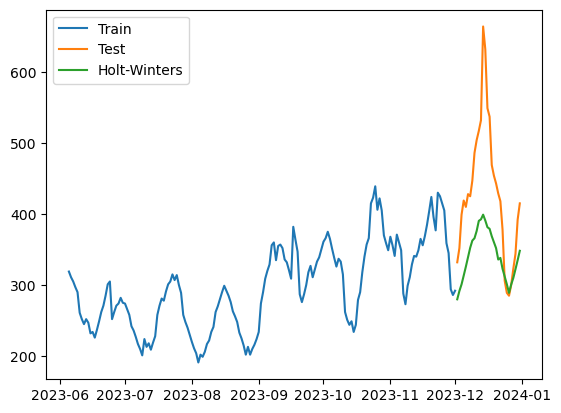

In [228]:
plt.plot(C['Date'], C['ppm'], label='Train')
plt.plot(C_test['Date'], C_test['ppm'], label='Test')
plt.plot(C_test['Date'], pred_C, label='Holt-Winters')
plt.legend(loc='best')

In [235]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    endog=A['calls'],
    seasonal_order=(2, 0, 1, 52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

In [236]:
model_fit = model.fit(disp=False)

KeyboardInterrupt: 

In [231]:
forecast = model_fit.forecast(steps=len(A_test))

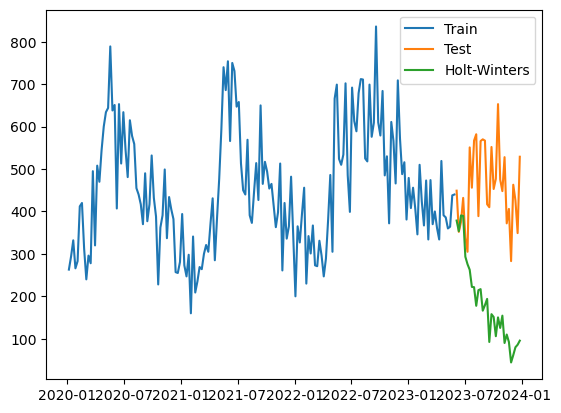

In [232]:
plt.plot(A['date'], A['calls'], label='Train')
plt.plot(A_test['date'], A_test['calls'], label='Test')
plt.plot(A_test['date'], forecast, label='Holt-Winters')
plt.legend(loc='best')

c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


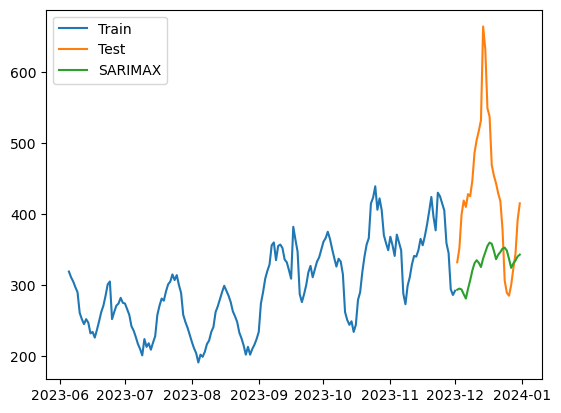

In [250]:
modelc = SARIMAX(
    C['ppm'],
    order=(2,0,2),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

predc = modelc.forecast(len(C_test))


plt.plot(C['Date'], C['ppm'], label='Train')
plt.plot(C_test['Date'], C_test['ppm'], label='Test')
plt.plot(C_test['Date'], predc, label='SARIMAX')
plt.legend(loc='best')